# Linear Regression with scikit-learn

In [7]:
import numpy as np

x = np.arange(12)

x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
lags = 3
m = np.zeros((lags+1, len(x) - lags))
m

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [12]:
for i in range(lags+1):
    if i == lags:
        m[i] = x[i:]
    else:
        m[i] = x[i:i-lags]

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.],
       [  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       [  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
       [  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.]])

In [15]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

lm.fit(m[:lags].T, m[lags])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
lm.coef_

array([ 0.33333333,  0.33333333,  0.33333333])

In [17]:
lm.intercept_

2.0000000000000018

In [18]:
lm.predict(m[:lags].T)

array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.])

In [20]:
lm = linear_model.LinearRegression(fit_intercept=False)
lm.fit(m[:lags].T, m[lags])
lm.coef_

array([-0.66666667,  0.33333333,  1.33333333])

In [21]:
lm.intercept_

0.0

In [22]:
lm.predict(m[:lags].T)

array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.])

# Classification problem

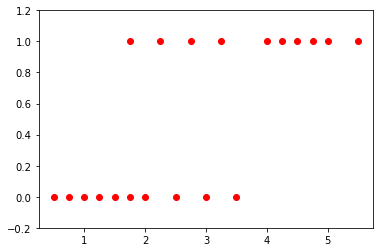

In [23]:
import numpy as np
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                          2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                          4.5, 4.75, 5., 5.5])
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                            0, 1, 1, 1, 1, 1, 1]) 

import matplotlib.pyplot as plt

plt.plot(hours, success, 'ro')
plt.ylim(-0.2, 1.2)
plt.show()

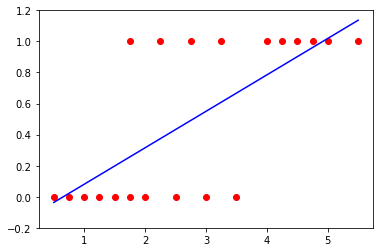

In [24]:
reg = np.polyfit(hours, success, deg=1)

plt.plot(hours, success, 'ro')
plt.plot(hours, np.polyval(reg, hours), 'b')
plt.ylim(-0.2, 1.2)
plt.show()

## Logistic regression

In [38]:
hours

array([ 0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  4.  ,  4.25,  4.5 ,  4.75,
        5.  ,  5.5 ])

In [37]:
hours.T

array([ 0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  4.  ,  4.25,  4.5 ,  4.75,
        5.  ,  5.5 ])

In [36]:
hours.reshape(1, -1).T

array([[ 0.5 ],
       [ 0.75],
       [ 1.  ],
       [ 1.25],
       [ 1.5 ],
       [ 1.75],
       [ 1.75],
       [ 2.  ],
       [ 2.25],
       [ 2.5 ],
       [ 2.75],
       [ 3.  ],
       [ 3.25],
       [ 3.5 ],
       [ 4.  ],
       [ 4.25],
       [ 4.5 ],
       [ 4.75],
       [ 5.  ],
       [ 5.5 ]])

In [26]:
from sklearn import linear_model
lm = linear_model.LogisticRegression()

hrs = hours.reshape(1, -1).T
hrs

array([[ 0.5 ],
       [ 0.75],
       [ 1.  ],
       [ 1.25],
       [ 1.5 ],
       [ 1.75],
       [ 1.75],
       [ 2.  ],
       [ 2.25],
       [ 2.5 ],
       [ 2.75],
       [ 3.  ],
       [ 3.25],
       [ 3.5 ],
       [ 4.  ],
       [ 4.25],
       [ 4.5 ],
       [ 4.75],
       [ 5.  ],
       [ 5.5 ]])

In [27]:
lm.fit(hrs, success)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

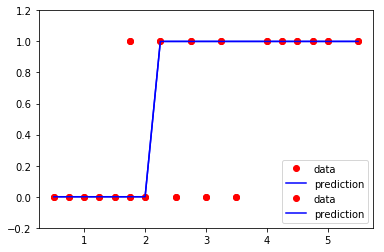

In [30]:
prediction = lm.predict(hrs)

plt.plot(hours, success, 'ro', label='data')
plt.plot(hours, prediction, 'b', label='prediction')
plt.legend(loc=0)
plt.ylim(-0.2, 1.2)
plt.show()

In [40]:
prob = lm.predict_proba(hrs)
prob

array([[ 0.74266571,  0.25733429],
       [ 0.71239698,  0.28760302],
       [ 0.6801015 ,  0.3198985 ],
       [ 0.64598167,  0.35401833],
       [ 0.61030789,  0.38969211],
       [ 0.5734132 ,  0.4265868 ],
       [ 0.5734132 ,  0.4265868 ],
       [ 0.53568295,  0.46431705],
       [ 0.49753977,  0.50246023],
       [ 0.4594252 ,  0.5405748 ],
       [ 0.42177947,  0.57822053],
       [ 0.38502138,  0.61497862],
       [ 0.3495303 ,  0.6504697 ],
       [ 0.31563167,  0.68436833],
       [ 0.25359079,  0.74640921],
       [ 0.22576725,  0.77423275],
       [ 0.20017775,  0.79982225],
       [ 0.17682625,  0.82317375],
       [ 0.15566862,  0.84433138],
       [ 0.11957644,  0.88042356]])

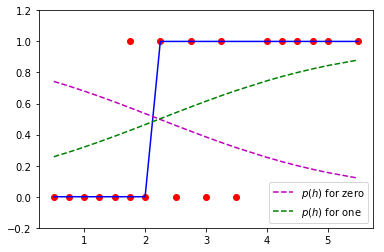

In [41]:
plt.plot(hours, success, 'ro')
plt.plot(hours, prediction, 'b')
plt.plot(hours, prob.T[0], 'm--', label='$p(h)$ for zero')
plt.plot(hours, prob.T[1], 'g--', label='$p(h)$ for one')
plt.ylim(-0.2, 1.2)
plt.legend(loc=0)
plt.show()

# Using logistic regression to predict market direction

In [43]:
import pandas as pd
from pandas_datareader import data as web

data = web.DataReader('^GSPC', data_source='yahoo', 
                     end='2016-10-31')['Adj Close']
data = pd.DataFrame(data)
data.rename(columns={'Adj Close':'price'}, inplace=True)
data['returns'] = np.log(data['price'] / data['price'].shift(1))
data.dropna(inplace=True)

lags = 3
m = np.zeros((lags+1, len(data) - lags))

for i in range(lags+1):
    if i == lags:
        m[i] = data.returns.values[i:]
    else:
        m[i] = data.returns.values[i:i-lags]

In [44]:
from sklearn import linear_model

lm = linear_model.LogisticRegression(C=1e3)

lm.fit(m[:lags].T, np.sign(m[lags]))

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [48]:
data['prediction'] = 0.0
data['prediction'].ix[lags:] = lm.predict(m[:lags].T)

data['prediction']

Date
2010-01-05    0.0
2010-01-06    0.0
2010-01-07    0.0
2010-01-08    1.0
2010-01-11    1.0
2010-01-12    1.0
2010-01-13    1.0
2010-01-14    1.0
2010-01-15    1.0
2010-01-19    1.0
2010-01-20    1.0
2010-01-21    1.0
2010-01-22    1.0
2010-01-25    1.0
2010-01-26    1.0
2010-01-27    1.0
2010-01-28    1.0
2010-01-29    1.0
2010-02-01    1.0
2010-02-02    1.0
2010-02-03    1.0
2010-02-04    1.0
2010-02-05    1.0
2010-02-08    1.0
2010-02-09    1.0
2010-02-10    1.0
2010-02-11    1.0
2010-02-12    1.0
2010-02-16    1.0
2010-02-17   -1.0
             ... 
2016-09-20    1.0
2016-09-21    1.0
2016-09-22    1.0
2016-09-23    1.0
2016-09-26    1.0
2016-09-27    1.0
2016-09-28    1.0
2016-09-29    1.0
2016-09-30    1.0
2016-10-03    1.0
2016-10-04    1.0
2016-10-05    1.0
2016-10-06    1.0
2016-10-07    1.0
2016-10-10    1.0
2016-10-11    1.0
2016-10-12    1.0
2016-10-13    1.0
2016-10-14    1.0
2016-10-17    1.0
2016-10-18    1.0
2016-10-19    1.0
2016-10-20    1.0
2016-10-21    1.0
2016-

In [51]:
hits = np.sign(data['returns'].ix[lags:] *
              data['prediction'].ix[lags:]).value_counts()
hits

 1.0    925
-1.0    791
dtype: int64

In [52]:
hits.values[0] / sum(hits)

0.53904428904428903

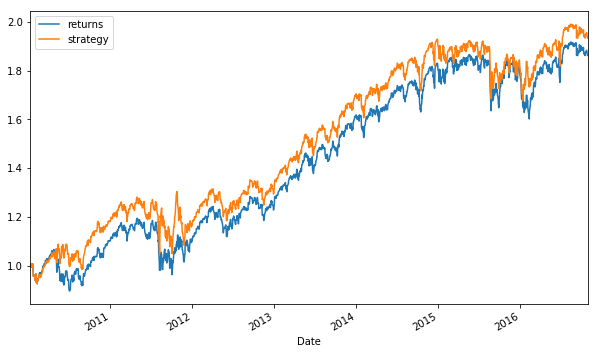

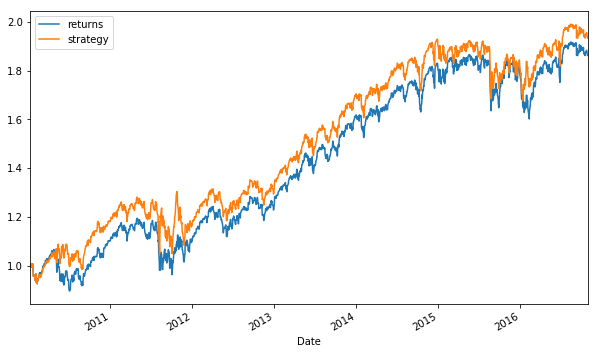

In [54]:
data['strategy'] = data['prediction'] * data['returns']
data[['returns', 'strategy']].ix[lags:].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.show()

## Increase logistic regression lags to 15

In [55]:
lags = 15

m = np.zeros((lags+1, len(data) - lags))

for i in range(lags + 1):
    if i == lags:
        m[i] = data.returns.values[i:]
    else:
        m[i] = data.returns.values[i:i-lags]

lm.fit(m[:lags].T, np.sign(m[lags]))

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [58]:
data['prediction'] = 0.0
data['prediction'].ix[lags:] = lm.predict(m[:lags].T)
hits = np.sign(data['returns'].ix[lags:] * data['prediction'].ix[lags:]).value_counts()
hits

 1.0    934
-1.0    770
dtype: int64

In [59]:
hits.values[0] / sum(hits)

0.5481220657276995

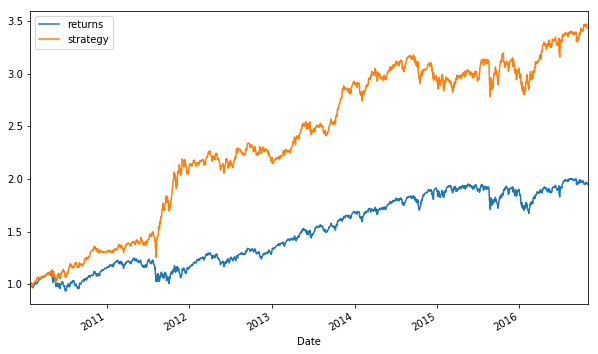

In [60]:
data['strategy'] = data['prediction'] * data['returns']
data[['returns', 'strategy']].ix[lags:].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.show()

# ScikitBacktesterClass

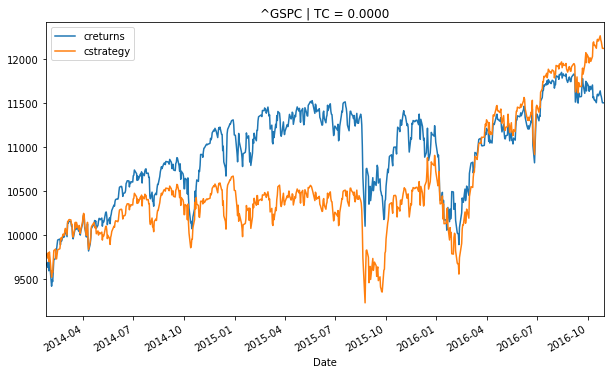

In [64]:
import ScikitVectorBacktester as SCI
scibt = SCI.ScikitVectorBacktester('^GSPC', '2010-1-1', '2016-10-31',
                                  10000, 0.0, 'logistic')
scibt.run_strategy('2010-1-1', '2013-12-31',
                  '2014-1-1', '2016-10-31', lags=15)
scibt.plot_results()
plt.show()